In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../static/result.csv')
df.head()

length = [*range(1,25)]

replacement_ans = {
    "Agree": 1,
    "Unsure": 0,
    "Disagree": -1,
}

replacement_conf = {
    "7-Extremely confident": 7,
    "6-Very confident": 6,
    "5-Somewhat confident": 5,
    "4-Neutral": 4,
    "3-Somewhat lacking confidence": 3,
    "2-Very lacking confidence": 2,
    "1-Extremely lacking confidence": 1,
}

replacement_factors = {
    "Strongly agree": 3,
    "Agree": 2,
    "Somewhat agree": 1,
    "Neither agree nor disagree": 0,
    "Somewhat disagree": -1,
    "Disagree": -2,
    "Strongly disagree": -3,
}

condition = [
    "control",
    "ai-edited-image",
    "ai-edited-video",
    "ai-edited-image-video",
]

factors_cols = [
    "filter-familiarity",
    "forgetting",
    "memory-efficacy_1",
    "memory-efficacy_2",
    "naive-skepticism_1",
    "naive-skepticism_2",
    "naive-skepticism_3",
    "naive-skepticism_4",
    "naive-skepticism_5",
    "naive-skepticism_6",
    "naive-skepticism_7",
    "age",
    "education",
    "gender",
]

induced_imgs = [1,2,3,4,9,10,11,12,17,18,19,20]
non_induced_imgs = [5,6,7,8,13,14,15,16,21,22,23,24]

correct_is_true = [6,7,9,10,14,18,21,23]
correct_is_false = [1,2,3,4,5,8,11,12,13,15,16,17,19,20,22,24]

# get filtered columns
filtered_cols = [[f"{i}_false_memories_ans"] for i in length if i in induced_imgs]
filtered_cols = [i for sublist in filtered_cols for i in sublist]

# remove headers and replace values
head = df.head(1)
df = df[2:][['condition', *factors_cols, *filtered_cols]]

ans_conf = df[['condition', *filtered_cols]].copy()
ans_conf.replace(replacement_ans, inplace=True)
ans_conf.replace(replacement_conf, inplace=True)

factors = df[[*factors_cols]].copy()

replacement_edgecases = {
    "7-Very Familiar": 7,
    "1-Not familiar at all": 1,
    "7-No Problems": 7,
    "1-Major Problems": 1,
}

replacement_education = {
    "High school diploma or GED": 1,
    "Associates or technical degree": 2,
    "Some college, but no degree": 3,
    "Bachelor’s degree": 4,
    "Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS etc.)": 5,
}

factors.replace(replacement_factors, inplace=True)
factors.replace(replacement_edgecases, inplace=True)
factors.replace(replacement_education, inplace=True)

# result = df.copy()
# result = result[['condition'] + [f"{i}_false_memories_ans" for i in length]  + [f"{i}_false_memories_conf" for i in length]]

# convert raw answer to score (1 -> correct, 0 -> unsure, -1 -> wrong)
for i in induced_imgs:
    multiplier = 1 if i in correct_is_true else -1
    ans_conf[f"{i}_false_memories_ans"] *= multiplier

filtered_ans = ans_conf.copy().replace(1,0).replace(-1,1)
filtered_ans['sum'] = filtered_ans[[f"{i}_false_memories_ans" for i in length if i in induced_imgs]].sum(axis=1)

factors['filter'] = factors['filter-familiarity'].astype(int)
factors['forgetting'] = factors['forgetting'].astype(int)
factors['age'] = factors['age'].astype(int)
factors['skepticism'] = factors[['naive-skepticism_1', 'naive-skepticism_2', 'naive-skepticism_3', 'naive-skepticism_4', 'naive-skepticism_5', 'naive-skepticism_6', 'naive-skepticism_7']].sum(axis=1)
factors['memory'] = factors[['memory-efficacy_1', 'memory-efficacy_2']].sum(axis=1)

result = pd.concat([filtered_ans, factors], axis=1)
result = result[['condition', 'sum', 'filter', 'forgetting', 'memory', 'skepticism', 'age', 'education', 'gender']]

/var/folders/62/xfnymhpn2tqfs585kpyr_gph0000gn/T/ipykernel_43394/705343561.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ans_conf.replace(replacement_ans, inplace=True)
/var/folders/62/xfnymhpn2tqfs585kpyr_gph0000gn/T/ipykernel_43394/705343561.py:94: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  factors.replace(replacement_factors, inplace=True)
/var/folders/62/xfnymhpn2tqfs585kpyr_gph0000gn/T/ipykernel_43394/705343561.py:96: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

In [2]:
age = df['age'].to_numpy().astype(int)

# get mean
print(np.mean(age))

# get s.d.
print(np.std(age))

37.955
12.2475701671801


In [3]:
result

,condition,sum,filter,forgetting,memory,skepticism,age,education,gender
2,ai-edited-image-video,5,2,4,3.0,13.0,20,1,Male
3,ai-edited-video,8,6,3,5.0,7.0,28,3,Male
4,control,4,3,6,6.0,21.0,61,4,Male
5,ai-edited-image-video,3,4,6,3.0,-5.0,53,1,Male
6,ai-edited-image,3,6,5,3.0,-5.0,39,4,Female
...,...,...,...,...,...,...,...,...,...
197,control,6,1,1,-1.0,9.0,34,5,Male
198,control,1,4,6,0.0,3.0,40,1,Male
199,ai-edited-image,2,1,6,4.0,19.0,70,3,Male
200,ai-edited-image-video,8,4,4,6.0,-16.0,24,5,Female


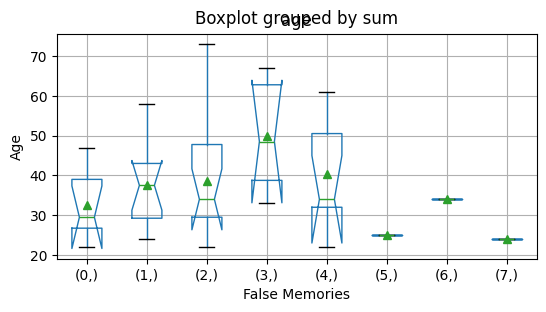

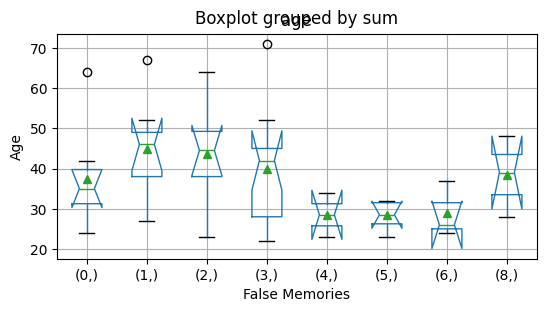

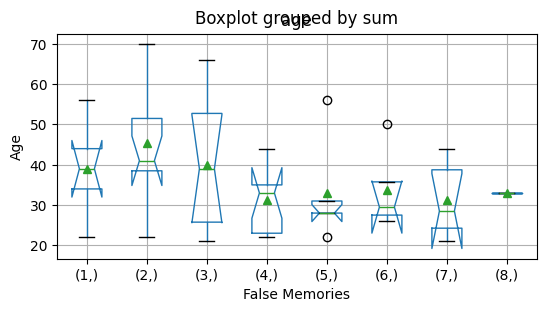

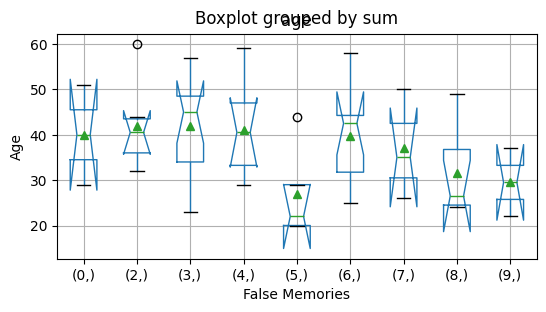

In [4]:
# rp.codebook(result)

for i in ['control', 'ai-edited-video', 'ai-edited-image', 'ai-edited-image-video']:
    boxplot = result.loc[result['condition'] == i].boxplot(["age"], by = ["sum"],
                         figsize = (6, 3),
                         showmeans = True,
                         notch = True)

    boxplot.set_xlabel("False Memories")
    boxplot.set_ylabel("Age")

In [5]:
import statsmodels.formula.api as smf

model = smf.mixedlm("sum ~ filter + forgetting + memory + education + age + skepticism + gender", #  + C(education, Treatment('High school diploma or GED'))
                    result,
                    groups= "condition").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:                MixedLM   Dependent Variable:   sum      
No. Observations:     200       Method:               REML     
No. Groups:           4         Scale:                3.9792   
Min. group size:      49        Log-Likelihood:       -433.8947
Max. group size:      51        Converged:            Yes      
Mean group size:      50.0                                     
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             5.019    1.002  5.009 0.000  3.056  6.983
gender[T.Male]       -0.040    0.291 -0.138 0.891 -0.610  0.530
gender[T.Non-binary]  0.021    2.063  0.010 0.992 -4.022  4.065
filter                0.040    0.087  0.454 0.650 -0.131  0.211
forgetting           -0.133    0.119 -1.121 0.262 -0.366  0.100
memory               -0.069    0.058 -1.194 0.232 -0.182  0.044
education             0.103    0.119  0.862 0.389 -0.131  0.336
age                  -0.031    0.012 -2.583 0.010 -0.055 -0.008
skepticism           -0.021    0.015 -1.376 0.169 -0.051  0.009
condition Var         1.039    0.463                           
===============================================================

"""

In [6]:
result

,condition,sum,filter,forgetting,memory,skepticism,age,education,gender
2,ai-edited-image-video,5,2,4,3.0,13.0,20,1,Male
3,ai-edited-video,8,6,3,5.0,7.0,28,3,Male
4,control,4,3,6,6.0,21.0,61,4,Male
5,ai-edited-image-video,3,4,6,3.0,-5.0,53,1,Male
6,ai-edited-image,3,6,5,3.0,-5.0,39,4,Female
...,...,...,...,...,...,...,...,...,...
197,control,6,1,1,-1.0,9.0,34,5,Male
198,control,1,4,6,0.0,3.0,40,1,Male
199,ai-edited-image,2,1,6,4.0,19.0,70,3,Male
200,ai-edited-image-video,8,4,4,6.0,-16.0,24,5,Female
